In [2]:
import sys

sys.path.append("../")

import behav_viz.ingest as ingest
import behav_viz.visualize as viz

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from behav_viz.utils import plot_utils as pu
from behav_viz.visualize.df_preperation import *
sns.set_context("talk")


%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
# R044, R054 not in cpoke yet
ANIMALS = [
    "R040",
    "R041",
    "R042",
    "R043",
    "R044",
    "R045",
    "R046",
    "R047",
    "R048",
    "R049",
    "R050",
    "R051",
    "R052",
    "R053",
    "R054",
    "R055",
    "R056",
    "R057",
]

date_min = "2024-07-20"

tdf = ingest.create_trials_df.create_trials_df_from_dj(ANIMALS, date_min)

animal_id R040
Fetched 23 dates from Sessions table from 2024-07-20 to 2024-08-11 for R040

animal_id R041
Fetched 23 dates from Sessions table from 2024-07-20 to 2024-08-11 for R041

animal_id R042
Fetched 23 dates from Sessions table from 2024-07-20 to 2024-08-11 for R042

animal_id R043
Fetched 24 dates from Sessions table from 2024-07-20 to 2024-08-11 for R043

animal_id R044
Fetched 22 dates from Sessions table from 2024-07-20 to 2024-08-11 for R044

animal_id R045
Fetched 22 dates from Sessions table from 2024-07-20 to 2024-08-11 for R045

animal_id R046
Fetched 23 dates from Sessions table from 2024-07-20 to 2024-08-11 for R046

animal_id R047
Fetched 21 dates from Sessions table from 2024-07-20 to 2024-08-10 for R047

animal_id R048
Fetched 16 dates from Sessions table from 2024-07-27 to 2024-08-11 for R048

animal_id R049
Fetched 13 dates from Sessions table from 2024-07-29 to 2024-08-11 for R049

animal_id R050
Fetched 16 dates from Sessions table from 2024-07-27 to 2024-08-1

# Stage Plots

In [4]:
animals = ["R042", "R043", "R045", "R048"]
multi_trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animals, date_min="2024-07-20"
)
multi_days_df = ingest.create_days_df.create_days_df_from_dj(
    animals, date_min="2024-07-20"
)

v1_animals = multi_trials_df[
    multi_trials_df["fix_experiment"] == "V1"
].animal_id.unique()
v2_animals = multi_trials_df[
    multi_trials_df["fix_experiment"] == "V2"
].animal_id.unique()

v1_trials = multi_trials_df.query("animal_id in @v1_animals").copy()
v2_trials = multi_trials_df.query("animal_id in @v2_animals").copy()
v1_days = multi_days_df.query("animal_id in @v1_animals").copy()
v2_days = multi_days_df.query("animal_id in @v2_animals").copy()

animal_id R042
Fetched 20 dates from Sessions table from 2024-07-20 to 2024-08-08 for R042

animal_id R043
Fetched 21 dates from Sessions table from 2024-07-20 to 2024-08-08 for R043

animal_id R045
Fetched 19 dates from Sessions table from 2024-07-20 to 2024-08-08 for R045

animal_id R048
Fetched 13 dates from Sessions table from 2024-07-27 to 2024-08-08 for R048



# Stage

## Days in Stage Box Plot

### Single Condition

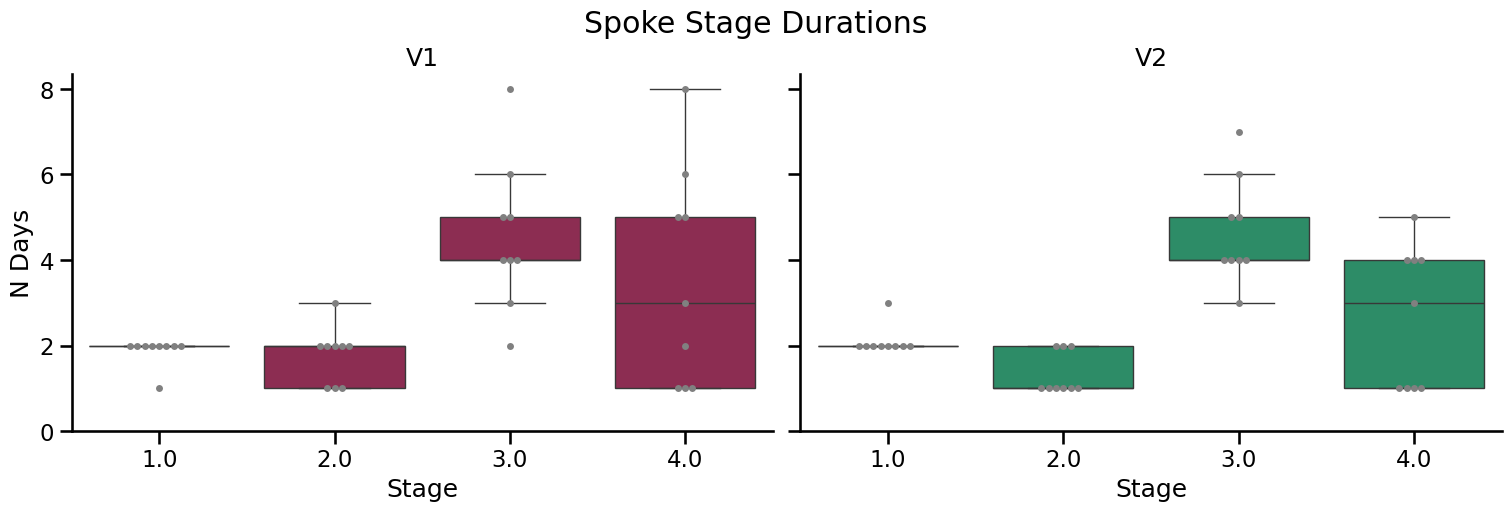

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True, sharey=True)
plt.suptitle("Spoke Stage Durations")

for i, (exp, sub_df) in enumerate(tdf.groupby("fix_experiment")):
    viz.FixationGrower.exp_compare_alpha.plot_days_in_stage_single_experiment(
        sub_df, experiment=exp, ax=ax[i], title=exp, min_stage=None, max_stage=4
    )

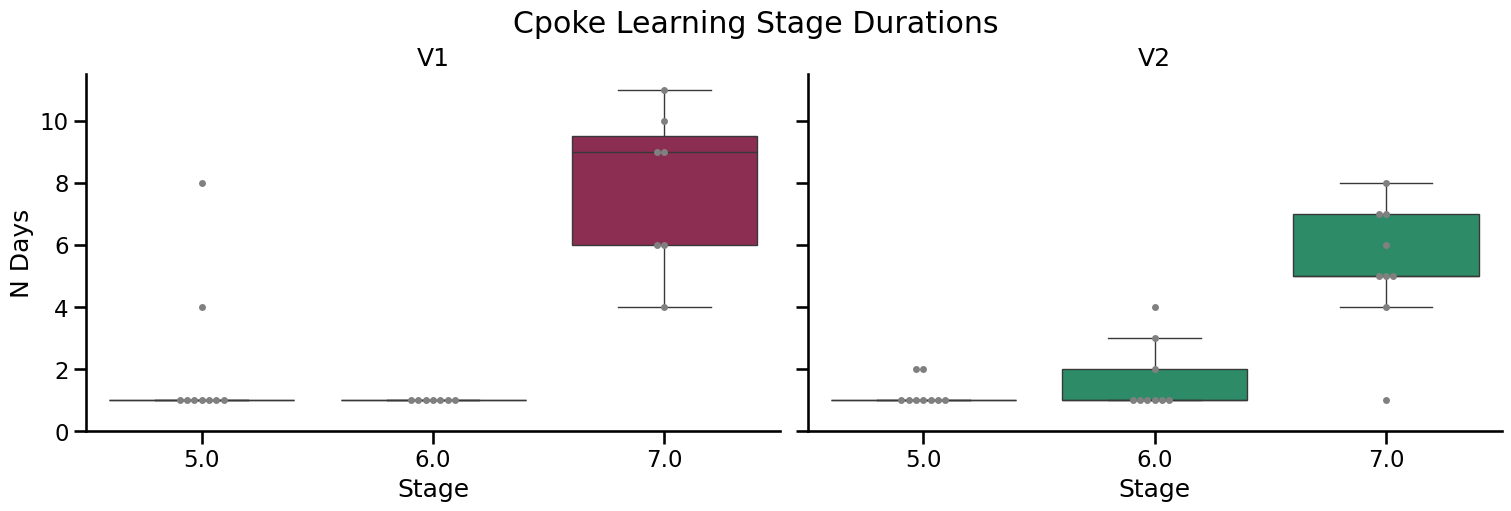

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True, sharey=True)
plt.suptitle("Cpoke Learning Stage Durations")

for i, (exp, sub_df) in enumerate(tdf.groupby("fix_experiment")):
    viz.FixationGrower.exp_compare_alpha.plot_days_in_stage_single_experiment(
        sub_df, experiment=exp, ax=ax[i], title=exp, min_stage=5, max_stage=7
    )

### Comparing Conditions

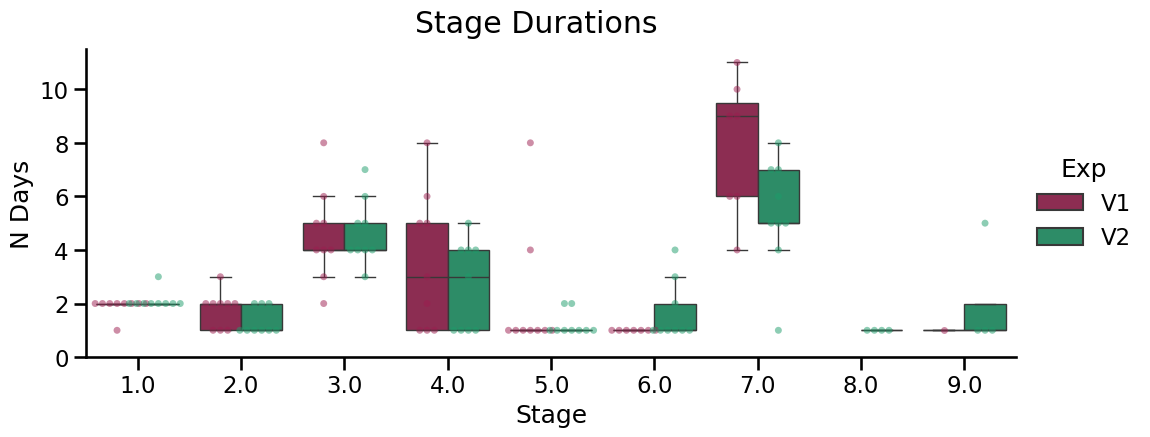

In [83]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.suptitle("Stage Durations")
viz.FixationGrower.exp_compare_alpha.plot_days_in_stage_compare_experiment(tdf, ax=ax)

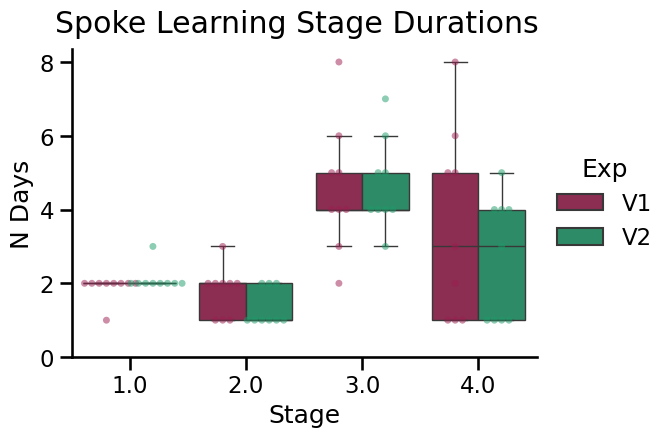

In [81]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.suptitle("Spoke Learning Stage Durations")
viz.FixationGrower.exp_compare_alpha.plot_days_in_stage_compare_experiment(
    tdf, min_stage=None, max_stage=4, ax=ax
)

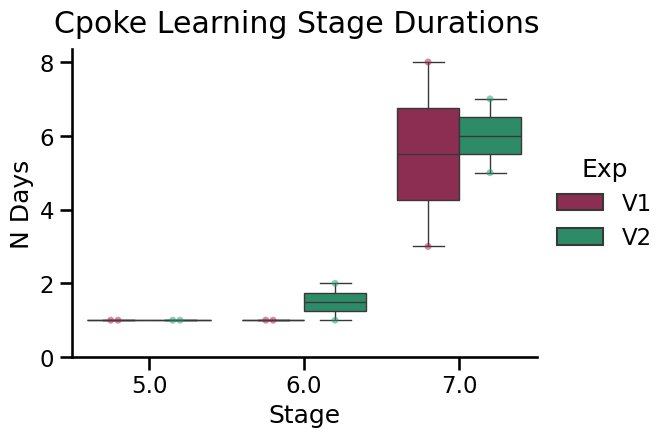

In [82]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.suptitle("Cpoke Learning Stage Durations")
viz.FixationGrower.exp_compare_alpha.plot_days_in_stage_compare_experiment(
    multi_trials_df, min_stage=5, max_stage=7, ax=ax
)

## Stage over Days

### Single Condition

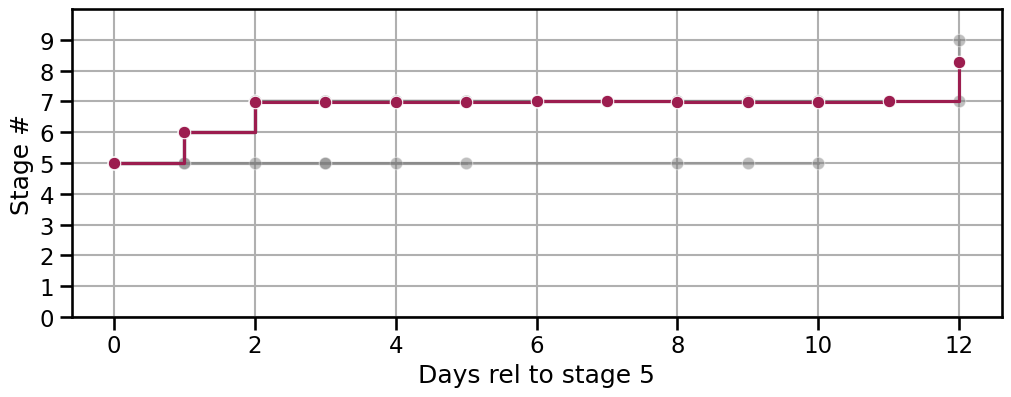

In [93]:
plot_df = tdf.query("stage >= 5").copy()
fig, ax = pu.make_fig()
viz.FixationGrower.exp_compare_alpha.plot_ma_stage_single_experiment(
    plot_df, experiment="V1", relative_to_stage=5, ax=ax
)
ax.grid()

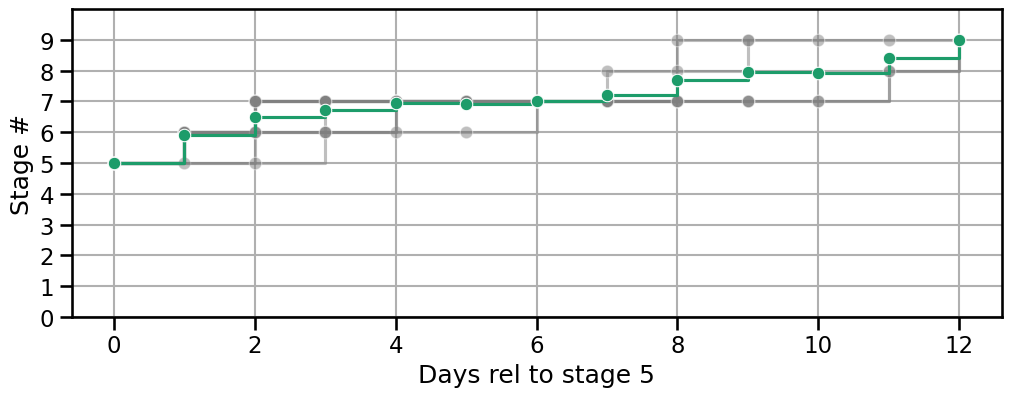

In [104]:
plot_df = tdf.query("stage >= 5").copy()
fig, ax = pu.make_fig()
viz.FixationGrower.exp_compare_alpha.plot_ma_stage_single_experiment(
    plot_df, experiment="V2", relative_to_stage=5, ax=ax
)
ax.grid()

### Comparing Conditions

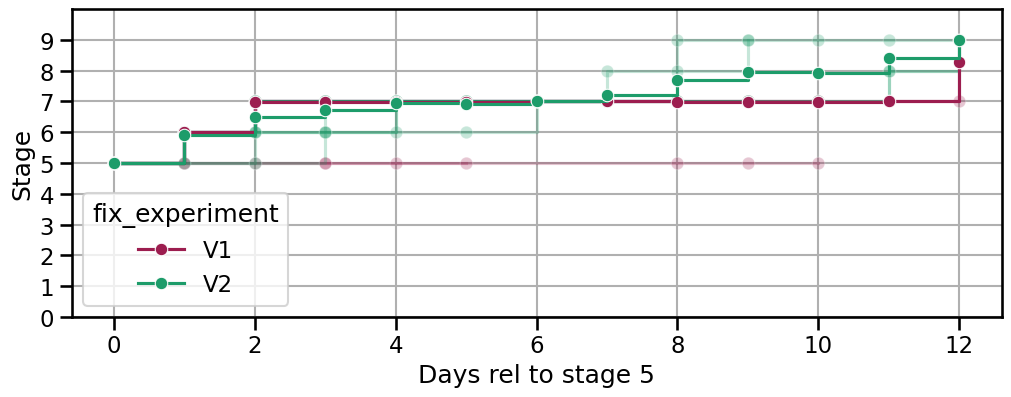

In [103]:
plot_df = tdf.query("stage >= 5").copy()
fig, ax = pu.make_fig()
viz.FixationGrower.exp_compare_alpha.plot_ma_stage_compare_experiments(
    plot_df, relative_to_stage=5, ax=ax
)

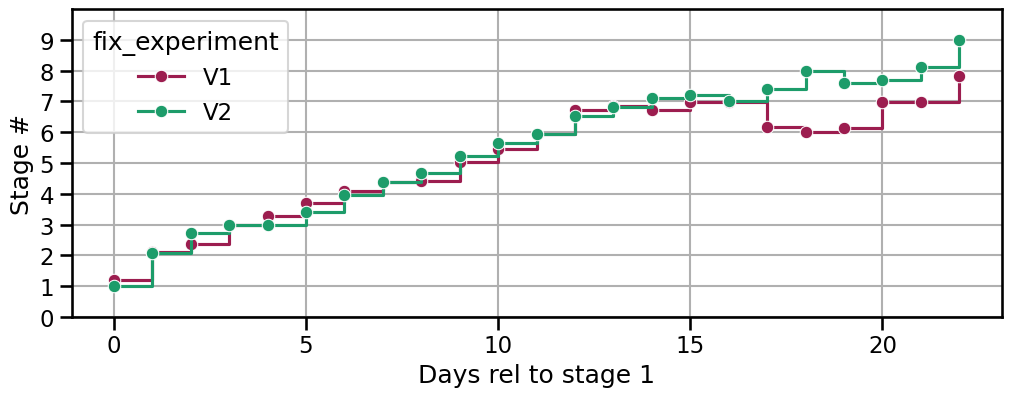

In [106]:
viz.FixationGrower.exp_compare_alpha.plot_stage_compare_experiment(
    tdf, rotate_x_labels=False, relative_to_stage=1
)

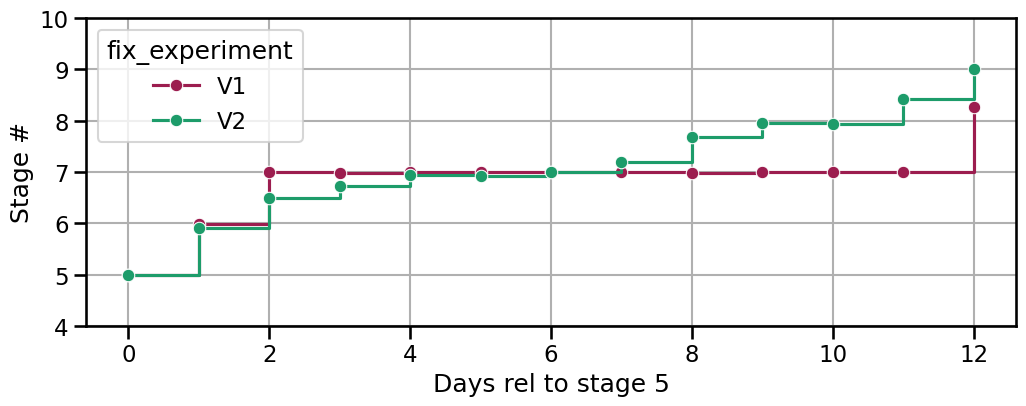

In [102]:
viz.FixationGrower.exp_compare_alpha.plot_stage_compare_experiment(
    tdf.query("stage >=5").copy(),
    rotate_x_labels=False,
    relative_to_stage=5,
    ylim=(4, 10),
)

## Days in Stage by Animal

### Single Condition

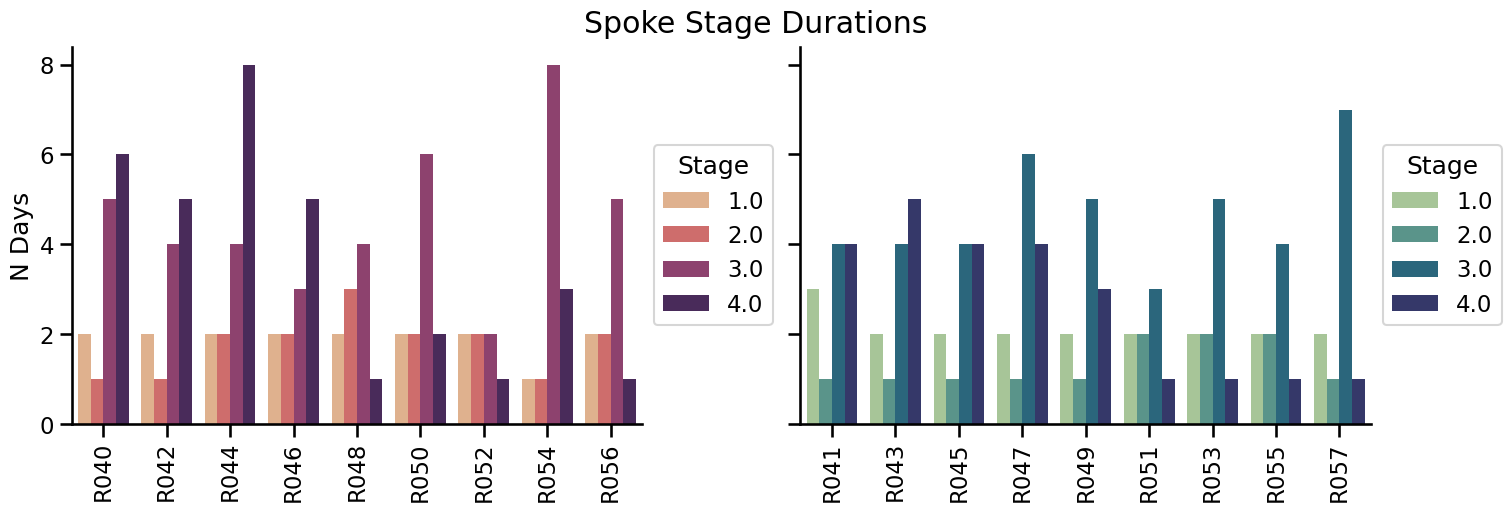

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True, sharey=True)
plt.suptitle("Spoke Stage Durations")
for i, (exp, sub_df) in enumerate(tdf.groupby("fix_experiment")):
    viz.FixationGrower.exp_compare_alpha.plot_stage_in_stage_by_animal_single_experiment(
        sub_df, experiment=exp, min_stage=None, max_stage=4, ax=ax[i]
    )

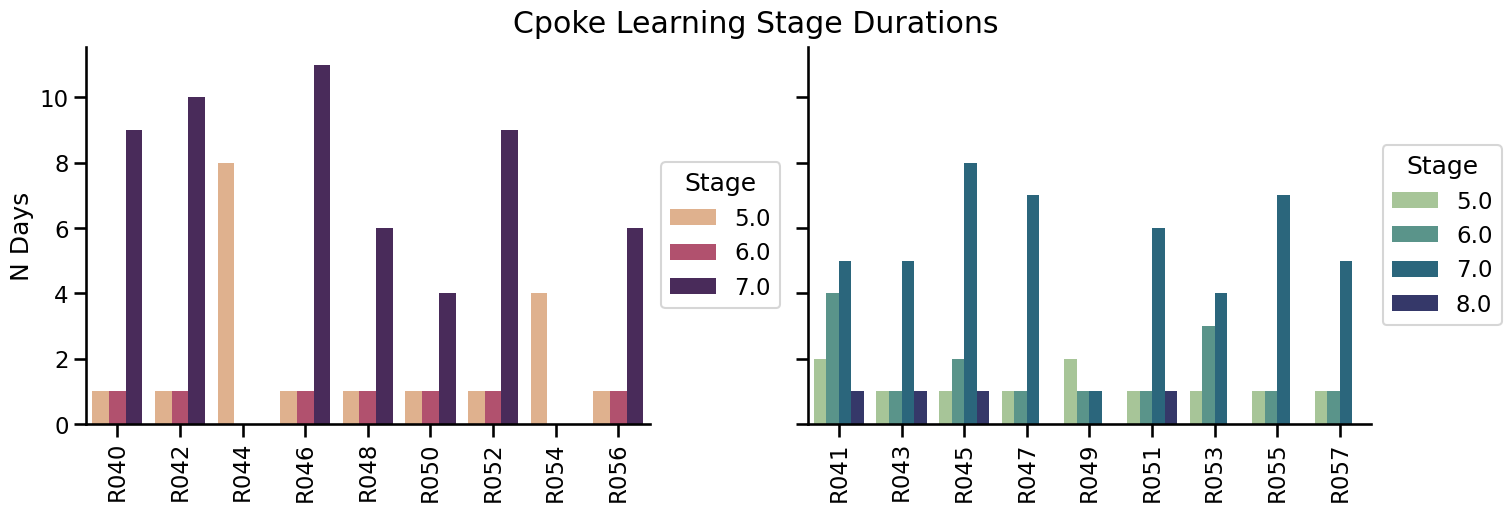

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True, sharey=True)
plt.suptitle("Cpoke Learning Stage Durations")
for i, (exp, sub_df) in enumerate(tdf.groupby("fix_experiment")):
    viz.FixationGrower.exp_compare_alpha.plot_stage_in_stage_by_animal_single_experiment(
        sub_df, experiment=exp, min_stage=5, max_stage=8, ax=ax[i]
    )

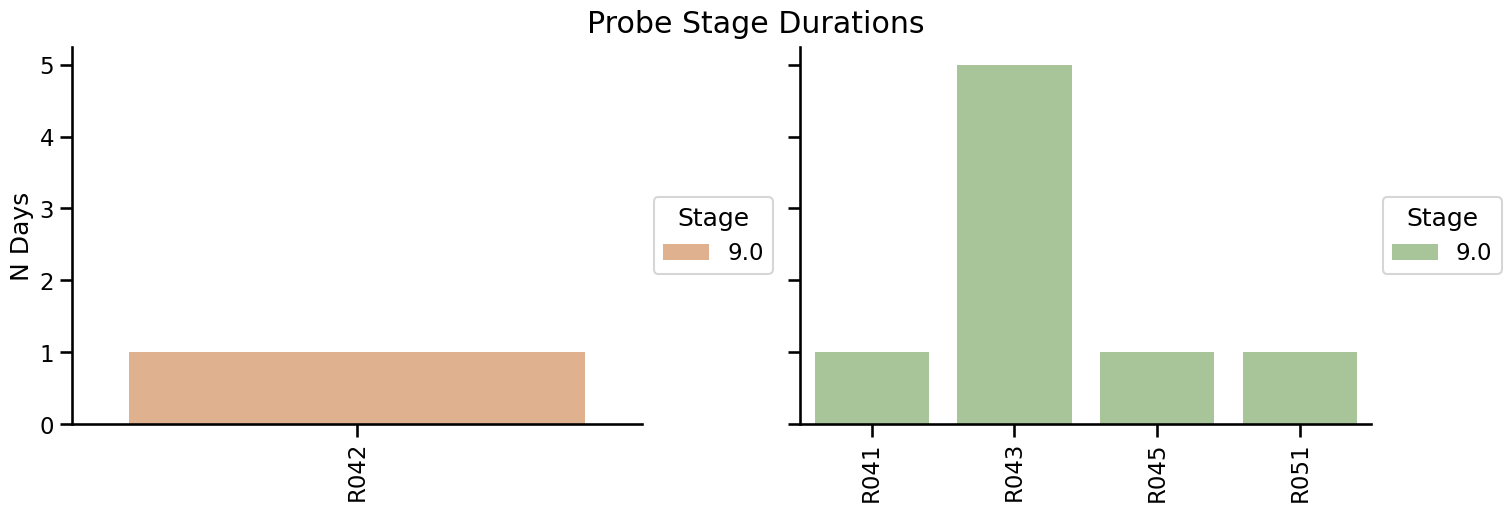

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True, sharey=True)
plt.suptitle("Probe Stage Durations")
for i, (exp, sub_df) in enumerate(tdf.groupby("fix_experiment")):
    viz.FixationGrower.exp_compare_alpha.plot_stage_in_stage_by_animal_single_experiment(
        sub_df, experiment=exp, min_stage=9, max_stage=10, ax=ax[i]
    )